In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [5]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("sales.csv")

In [12]:
df

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113031,2016-04-12,12,April,2016,41,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",3,24,64,112,72,184
113032,2014-04-02,2,April,2014,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113033,2016-04-02,2,April,2016,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113034,2014-03-04,4,March,2014,37,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",24,24,64,684,576,1260


In [13]:
df.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Date              113036 non-null  object
 1   Day               113036 non-null  int64 
 2   Month             113036 non-null  object
 3   Year              113036 non-null  int64 
 4   Customer_Age      113036 non-null  int64 
 5   Age_Group         113036 non-null  object
 6   Customer_Gender   113036 non-null  object
 7   Country           113036 non-null  object
 8   State             113036 non-null  object
 9   Product_Category  113036 non-null  object
 10  Sub_Category      113036 non-null  object
 11  Product           113036 non-null  object
 12  Order_Quantity    113036 non-null  int64 
 13  Unit_Cost         113036 non-null  int64 
 14  Unit_Price        113036 non-null  int64 
 15  Profit            113036 non-null  int64 
 16  Cost              113036 non-null  int

In [16]:
df.shape

(113036, 18)

In [18]:
df.describe()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,15.665753,2014.401739,35.919212,11.901660,267.296366,452.938427,285.051665,469.318695,754.370360
std,8.781567,1.272510,11.021936,9.561857,549.835483,922.071219,453.887443,884.866118,1309.094674
min,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,63.000000
50%,16.000000,2014.000000,35.000000,10.000000,9.000000,24.000000,101.000000,108.000000,223.000000
75%,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,358.000000,432.000000,800.000000
max,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000


In [20]:
missing_values = df.isna().sum().sort_values(ascending = False)
duplicates = df.duplicated().sum()

missing_values, duplicates

(Date                0
 Day                 0
 Cost                0
 Profit              0
 Unit_Price          0
 Unit_Cost           0
 Order_Quantity      0
 Product             0
 Sub_Category        0
 Product_Category    0
 State               0
 Country             0
 Customer_Gender     0
 Age_Group           0
 Customer_Age        0
 Year                0
 Month               0
 Revenue             0
 dtype: int64,
 1000)

In [21]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

In [46]:
top_profitable_products = df.groupby('Product')['Profit'].sum().sort_values(ascending=False).head(5)

top_profitable_products

Product
Mountain-200 Black, 38     1310464
Road-150 Red, 62           1243755
Mountain-200 Silver, 42    1231452
Sport-100 Helmet, Red      1191402
Mountain-200 Silver, 38    1165560
Name: Profit, dtype: int64

In [48]:
top_product_categories = df['Product_Category'].value_counts()

top_product_categories

Product_Category
Accessories    70120
Bikes          25982
Clothing       16934
Name: count, dtype: int64

In [71]:
top_countries_revenue = df.groupby('Country')['Revenue'].sum().sort_values(ascending=False).head(3)
top_countries_revenue

Country
United States     27975547
Australia         21302059
United Kingdom    10646196
Name: Revenue, dtype: int64

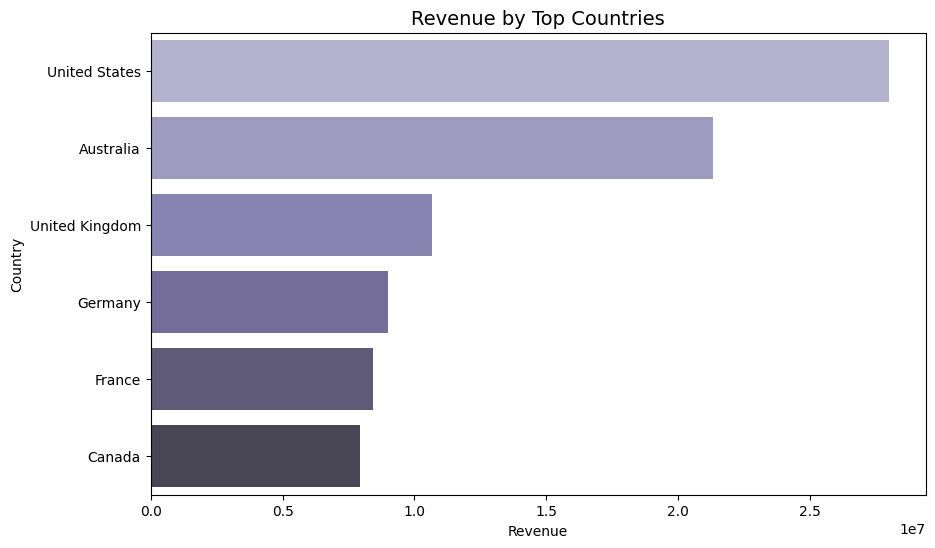

In [73]:
top_countries_revenue_sorted = df.groupby('Country')['Revenue'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries_revenue_sorted.values, y=top_countries_revenue_sorted.index, palette="Purples_d")
plt.title("Revenue by Top Countries", fontsize=14)
plt.xlabel("Revenue")
plt.ylabel("Country")
plt.show()


In [56]:
age_group_distribution = df['Age_Group'].value_counts()
age_group_distribution

Age_Group
Adults (35-64)          55824
Young Adults (25-34)    38654
Youth (<25)             17828
Seniors (64+)             730
Name: count, dtype: int64

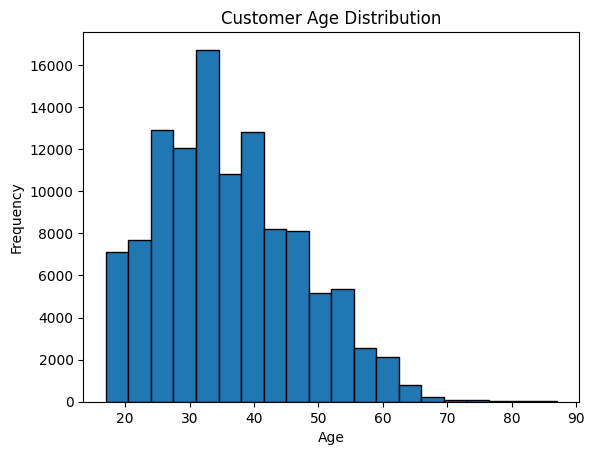

In [59]:
plt.hist(df['Customer_Age'] , bins=20 , edgecolor = 'black' )
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [60]:
# Частота покупок в возрастной группе
purchase_frequency = df.groupby(['Age_Group', 'Product_Category']).size().reset_index(name='Purchase_Frequency')

purchase_frequency.head(12)

,Age_Group,Product_Category,Purchase_Frequency
0,Adults (35-64),Accessories,34750
1,Adults (35-64),Bikes,12698
2,Adults (35-64),Clothing,8376
3,Seniors (64+),Accessories,572
4,Seniors (64+),Bikes,56
5,Seniors (64+),Clothing,102
6,Young Adults (25-34),Accessories,22992
7,Young Adults (25-34),Bikes,9834
8,Young Adults (25-34),Clothing,5828
9,Youth (<25),Accessories,11806


In [50]:
gender_revenue = df.groupby('Customer_Gender')['Revenue'].sum()
gender_revenue

Customer_Gender
F    41935599
M    43335409
Name: Revenue, dtype: int64

In [53]:
month_highest_revenue = df.groupby('Month')['Revenue'].sum().idxmax()

month_highest_revenue

'December'

In [61]:
# процент дохода, остающийся после вычета расходов из выручки от продаж
profit_margin_category = df.groupby('Product_Category').apply(lambda x: (x['Profit'].sum() / x['Revenue'].sum()) * 100)

profit_margin_category

Product_Category
Accessories    58.621390
Bikes          33.212313
Clothing       33.920524
dtype: float64

In [62]:
df['Sub_Category'].nunique()

17

In [64]:
# Product sub category 
sub_product_metrics = df.groupby('Sub_Category').agg({
    'Order_Quantity': 'sum', 
    'Unit_Cost': 'mean', 
    'Unit_Price': 'mean',
    'Cost': 'sum', 
    'Revenue':'sum',
    'Profit': 'sum'
}).reset_index()

product_metric = df.groupby('Product_Category').agg({
    'Order_Quantity': 'sum',                        
    'Cost': 'sum',
    'Revenue': 'sum',
    'Profit': 'sum',         
}).reset_index()

sub_product_metrics, product_metric

(         Sub_Category  Order_Quantity    Unit_Cost   Unit_Price      Cost  \
 0          Bike Racks            4741    45.000000   120.000000    213345   
 1         Bike Stands            2412    58.877193   158.657895    142140   
 2   Bottles and Cages          241726     2.474175     6.434870    598576   
 3                Caps           67268     6.997705     8.998164    470856   
 4            Cleaners           27574     3.004440     8.001110     82930   
 5             Fenders           62138     7.995040    21.986111    496819   
 6              Gloves           39978     8.998511    23.997022    359765   
 7             Helmets          181606    13.000000    35.000000   2360878   
 8     Hydration Packs           19914    20.988006    54.970015    417738   
 9             Jerseys           88125    39.855574    51.855574   3510174   
 10     Mountain Bikes           11992  1080.580754  1973.944884  12963063   
 11         Road Bikes           19771  1179.812956  1898.903202

In [70]:
avg_profit_by_country = df.groupby('Country').apply(lambda x: x['Profit'].sum() / len(x)).sort_values(ascending=False).head(3)

avg_profit_by_country

Country
United Kingdom    324.071439
Germany           302.756803
Australia         283.089489
dtype: float64